In [70]:
import pandas as pd
import numpy as np


In [14]:
# Caminho do arquivo CSV
file_path = "C:\\Users\\lucas\\Downloads\\bbb2.csv"

# Ler o arquivo CSV em um DataFrame
df = pd.read_csv(file_path, sep='";"')



C:\Users\lucas\AppData\Local\Temp\ipykernel_47236\3942938924.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, sep='";"')


In [32]:
df = df.drop(df.columns[0], axis=1)


In [50]:
df = df.replace('"','', regex=True)

In [52]:
df = df.replace('',0, regex=True)

In [58]:
df = df.astype(float)


In [60]:
df

,b4_r4_m15_long_limit_002_Strategy 10.8.157: WIN$N_M1/M15,b4_r4_m15_long_limit_003_Strategy 3.11.140: WIN$N_M1/M15,b4_r4_m15_long_stop_003_Strategy 2.6.114: WIN$N_M1/M15,b4_r4_m15_long_stop_007_Strategy 2.10.183: WIN$N_M1/M15,b4_r4_m15_short_limit_001_Strategy 3.21.142: WIN$N_M1/M15,b4_r4_m15_short_limit_002_Strategy 10.19.168: WIN$N_M1/M15,b4_r4_m15_short_limit_002_Strategy 10.24.153: WIN$N_M1/M15,b4_r4_m15_short_limit_003_Strategy 4.13.135: WIN$N_M1/M15,b4_r4_m15_short_limit_004_Strategy 8.17.174: WIN$N_M1/M15,b4_r4_m15_short_limit_005_Strategy 1.24.184: WIN$N_M1/M15,...,b4_r4_m15_short_stop_005_Strategy 10.4.121: WIN$N_M1/M15,b4_r4_m15_short_stop_006_Strategy 2.1.134: WIN$N_M1/M15,b4_r4_m15_short_stop_006_Strategy 7.4.163: WIN$N_M1/M15,b4_r4_m15_short_stop_007_Strategy 3.12.182: WIN$N_M1/M15,b4_r4_m15_short_stop_007_Strategy 8.17.100: WIN$N_M1/M15,b4_r4_m15_short_stop_008_Strategy 1.46.170: WIN$N_M1/M15,b4_r4_m15_short_stop_009_Strategy 2.1.148: WIN$N_M1/M15,b4_r4_m15_short_stop_009_Strategy 6.1.144: WIN$N_M1/M15,b4_r4_m15_short_stop_010_Strategy 6.3.186: WIN$N_M1/M15,"b4_r4_m15_short_stop_010_Strategy 6.4.145: WIN$N_M1/M15"""
0,NaN,0.01,0.12,0.09,-0.03,-0.07,-0.01,-0.06,-0.12,-0.05,...,-0.05,-0.03,-0.06,-0.11,-0.11,-0.07,-0.13,-0.11,-0.07,-0.10
1,0.01,NaN,0.09,0.07,-0.05,-0.09,-0.00,-0.02,-0.09,-0.13,...,-0.09,-0.11,-0.09,-0.12,-0.10,0.01,-0.18,-0.12,-0.01,-0.01
2,0.12,0.09,NaN,0.31,0.05,-0.02,-0.05,-0.04,-0.06,-0.10,...,-0.08,-0.01,0.01,-0.01,-0.05,0.01,-0.03,-0.05,-0.02,-0.01
3,0.09,0.07,0.31,NaN,-0.06,0.01,-0.04,0.09,-0.12,-0.10,...,-0.11,-0.03,0.03,-0.01,-0.13,0.02,-0.02,-0.13,-0.02,0.00
4,-0.03,-0.05,0.05,-0.06,NaN,0.00,0.03,0.03,0.30,0.21,...,0.17,0.02,0.24,0.29,0.40,0.09,0.28,0.34,0.05,0.08
5,-0.07,-0.09,-0.02,0.01,0.00,NaN,0.09,0.12,0.03,0.21,...,0.12,0.14,0.16,0.14,0.08,0.23,0.21,0.10,0.11,0.15
6,-0.01,-0.00,-0.05,-0.04,0.03,0.09,NaN,0.06,0.05,0.06,...,0.02,0.02,0.03,0.05,0.06,0.03,0.03,0.02,0.02,0.07
7,-0.06,-0.02,-0.04,0.09,0.03,0.12,0.06,NaN,0.10,0.05,...,0.05,-0.00,0.13,0.12,0.05,0.17,0.12,0.03,0.05,0.13
8,-0.12,-0.09,-0.06,-0.12,0.30,0.03,0.05,0.10,NaN,0.24,...,0.20,0.06,0.28,0.32,0.65,0.07,0.43,0.42,0.05,0.11
9,-0.05,-0.13,-0.10,-0.10,0.21,0.21,0.06,0.05,0.24,NaN,...,0.57,0.05,0.35,0.45,0.37,0.08,0.51,0.35,0.06,0.05


In [62]:
df.iloc[[0]]

,b4_r4_m15_long_limit_002_Strategy 10.8.157: WIN$N_M1/M15,b4_r4_m15_long_limit_003_Strategy 3.11.140: WIN$N_M1/M15,b4_r4_m15_long_stop_003_Strategy 2.6.114: WIN$N_M1/M15,b4_r4_m15_long_stop_007_Strategy 2.10.183: WIN$N_M1/M15,b4_r4_m15_short_limit_001_Strategy 3.21.142: WIN$N_M1/M15,b4_r4_m15_short_limit_002_Strategy 10.19.168: WIN$N_M1/M15,b4_r4_m15_short_limit_002_Strategy 10.24.153: WIN$N_M1/M15,b4_r4_m15_short_limit_003_Strategy 4.13.135: WIN$N_M1/M15,b4_r4_m15_short_limit_004_Strategy 8.17.174: WIN$N_M1/M15,b4_r4_m15_short_limit_005_Strategy 1.24.184: WIN$N_M1/M15,...,b4_r4_m15_short_stop_005_Strategy 10.4.121: WIN$N_M1/M15,b4_r4_m15_short_stop_006_Strategy 2.1.134: WIN$N_M1/M15,b4_r4_m15_short_stop_006_Strategy 7.4.163: WIN$N_M1/M15,b4_r4_m15_short_stop_007_Strategy 3.12.182: WIN$N_M1/M15,b4_r4_m15_short_stop_007_Strategy 8.17.100: WIN$N_M1/M15,b4_r4_m15_short_stop_008_Strategy 1.46.170: WIN$N_M1/M15,b4_r4_m15_short_stop_009_Strategy 2.1.148: WIN$N_M1/M15,b4_r4_m15_short_stop_009_Strategy 6.1.144: WIN$N_M1/M15,b4_r4_m15_short_stop_010_Strategy 6.3.186: WIN$N_M1/M15,"b4_r4_m15_short_stop_010_Strategy 6.4.145: WIN$N_M1/M15"""
0,NaN,0.01,0.12,0.09,-0.03,-0.07,-0.01,-0.06,-0.12,-0.05,...,-0.05,-0.03,-0.06,-0.11,-0.11,-0.07,-0.13,-0.11,-0.07,-0.1


In [187]:


# Definir o limite X
X = 0.2

# Extrair a diagonal superior da matriz
mask = np.triu(np.ones(df.shape), k=1).astype(bool)
diagonal_superior = df.where(mask)

# Encontrar pares com correlação absoluta acima do limite X
pares_acima_limite = (diagonal_superior.abs() > X)

# Identificar variáveis que não atendem ao critério
variaveis_excluir = set()

for i in range(len(df)):
    for j in range(i+1, len(df)):
        if pares_acima_limite.iloc[i, j]:
            # Adiciona as variáveis que não atendem ao critério
            var_linha = df.index[i]
            var_coluna = df.columns[j]
            variaveis_excluir.add(var_linha)
            variaveis_excluir.add(var_coluna)

# Remover as variáveis que têm correlação fora do limite X
variaveis_incluir = [var for var in df.columns if var not in variaveis_excluir]

# Exibir a matriz de correlação filtrada
print("Matriz de correlação filtrada:")
for i in range(len(variaveis_incluir)):
    print("posição: ",i," valor: ",variaveis_incluir[i])

Matriz de correlação filtrada:
posição:  0  valor:  b4_r4_m15_long_limit_002_Strategy 10.8.157:  WIN$N_M1/M15
posição:  1  valor:  b4_r4_m15_long_limit_003_Strategy 3.11.140:  WIN$N_M1/M15
posição:  2  valor:  b4_r4_m15_long_stop_003_Strategy 2.6.114:  WIN$N_M1/M15
posição:  3  valor:  b4_r4_m15_short_limit_001_Strategy 3.21.142:  WIN$N_M1/M15
posição:  4  valor:  b4_r4_m15_short_limit_002_Strategy 10.19.168:  WIN$N_M1/M15
posição:  5  valor:  b4_r4_m15_short_limit_002_Strategy 10.24.153:  WIN$N_M1/M15
posição:  6  valor:  b4_r4_m15_short_limit_003_Strategy 4.13.135:  WIN$N_M1/M15
posição:  7  valor:  b4_r4_m15_short_limit_006_Strategy 4.12.166:  WIN$N_M1/M15
posição:  8  valor:  b4_r4_m15_short_stop_006_Strategy 2.1.134:  WIN$N_M1/M15


In [189]:
numeros_colunas = [df.columns.get_loc(col) for col in variaveis_incluir if col in df.columns]

In [191]:
df_filtrado = df[variaveis_incluir]

In [193]:
df_filtrado = df_filtrado.iloc[numeros_colunas, :]

In [195]:
df_filtrado

,b4_r4_m15_long_limit_002_Strategy 10.8.157: WIN$N_M1/M15,b4_r4_m15_long_limit_003_Strategy 3.11.140: WIN$N_M1/M15,b4_r4_m15_long_stop_003_Strategy 2.6.114: WIN$N_M1/M15,b4_r4_m15_short_limit_001_Strategy 3.21.142: WIN$N_M1/M15,b4_r4_m15_short_limit_002_Strategy 10.19.168: WIN$N_M1/M15,b4_r4_m15_short_limit_002_Strategy 10.24.153: WIN$N_M1/M15,b4_r4_m15_short_limit_003_Strategy 4.13.135: WIN$N_M1/M15,b4_r4_m15_short_limit_006_Strategy 4.12.166: WIN$N_M1/M15,b4_r4_m15_short_stop_006_Strategy 2.1.134: WIN$N_M1/M15
0,NaN,0.01,0.12,-0.03,-0.07,-0.01,-0.06,-0.11,-0.03
1,0.01,NaN,0.09,-0.05,-0.09,-0.00,-0.02,0.01,-0.11
2,0.12,0.09,NaN,0.05,-0.02,-0.05,-0.04,-0.00,-0.01
4,-0.03,-0.05,0.05,NaN,0.00,0.03,0.03,0.11,0.02
5,-0.07,-0.09,-0.02,0.00,NaN,0.09,0.12,0.20,0.14
6,-0.01,-0.00,-0.05,0.03,0.09,NaN,0.06,0.08,0.02
7,-0.06,-0.02,-0.04,0.03,0.12,0.06,NaN,0.18,-0.00
10,-0.11,0.01,-0.00,0.11,0.20,0.08,0.18,NaN,0.08
19,-0.03,-0.11,-0.01,0.02,0.14,0.02,-0.00,0.08,NaN


In [203]:
df_filtrado = df_filtrado.fillna(0)

<Axes: >

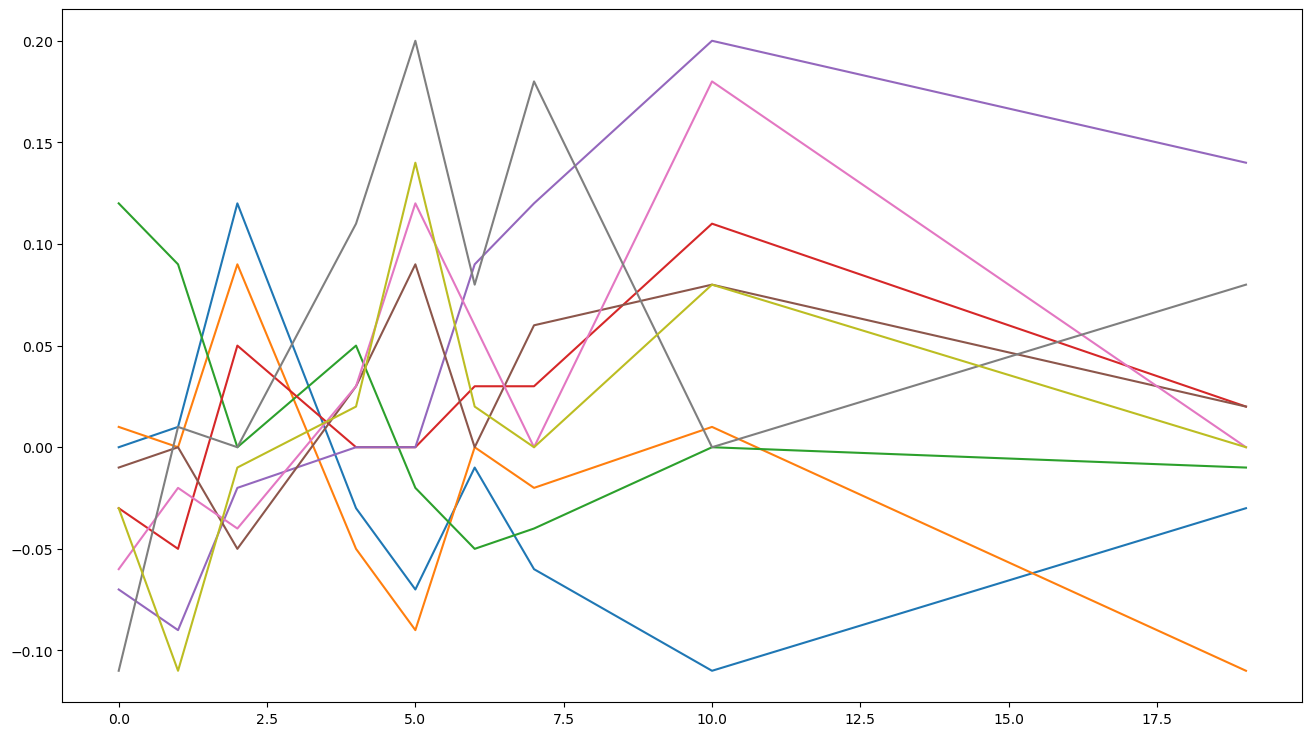

In [205]:
df_filtrado.plot(figsize = (16,9), legend=False)